In [1]:
import numpy as np
import matplotlib.pyplot as plt
from hmm import continuous_observation_HMM as cHMM

import os, sys
parentPath = os.path.abspath("..")
if parentPath not in sys.path:
    sys.path.insert(0, parentPath)
import utils

In [3]:
S = 3 #number of states
O = 2 #number of possible observations
A = np.zeros((S,S))
C = np.array([[-2,0,2],[-2,0,2]])
R = np.eye(2)
p0 = np.ones(S)/S
for i in range(S):
    for j in range(S):
        if i == j:
            A[i,j] = 0.9
        else:
            A[i,j] = 0.1/(S-1)

In [4]:
hmm = cHMM(A,C,R,p0,S,O)

In [5]:
states,observations = hmm.generate_data(100)

In [6]:
print states
print observations

[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1]
[array([-0.61726621, -0.61277275]), array([-1.45528495,  1.69843573]), array([-1.94607212, -1.58863316]), array([-0.82682704, -2.4989398 ]), array([-1.81825959, -1.77237916]), array([-2.11037026,  0.41182637]), array([-2.01156459, -2.07967783]), array([-1.59996596,  0.28289771]), array([-2.50508398, -2.26132849]), array([-0.74883562, -1.88329856]), array([-2.28215885, -1.95430617]), array([-2.30578935, -1.37774114]), array([-0.32810441,  1.96147454]), array([-0.77210323,  0.27234403]), array([1.28529576, 2.10984328]), array([0.63264204, 3.50494577]), array([1.77357932, 2.48583301]), array([0.28633106, 0.79580913]), array([1.59514187, 2.72720299]), array([1.18132148, 3.14419854]), array([1.9

In [7]:
t = range(100)

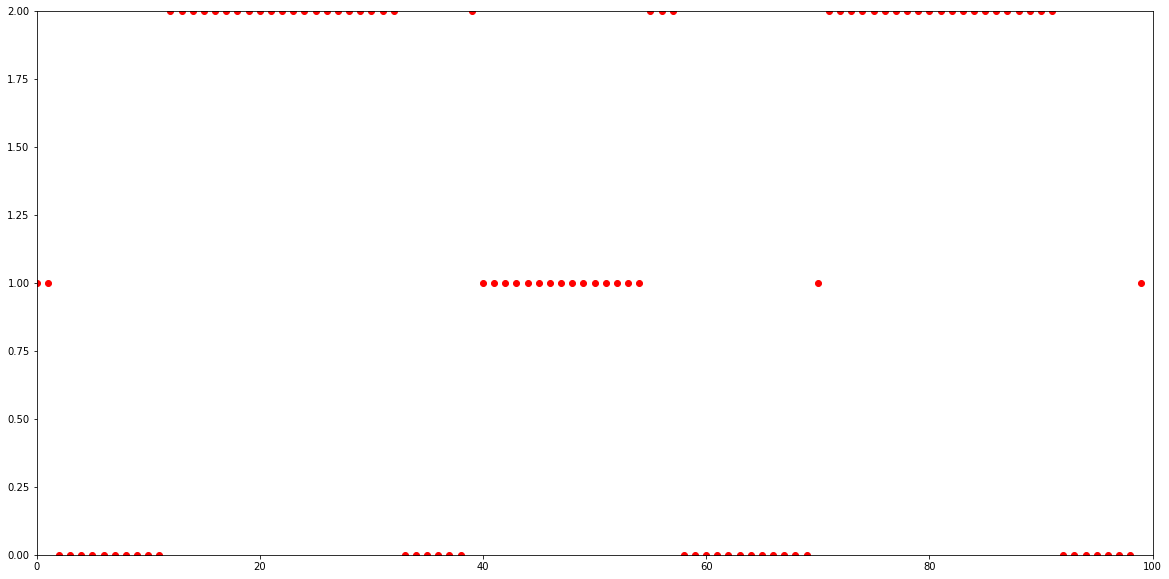

In [8]:
plt.figure(figsize=(20,10))
plt.plot(t, states, 'ro')
plt.axis([0,100,0,2])
plt.show()

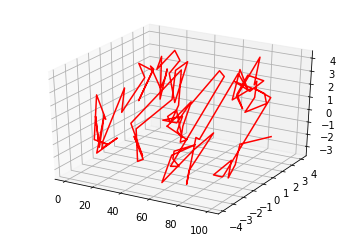

In [12]:
obs1_draw = []
obs2_draw = []
for obs in observations:
    obs1_draw.append(obs[0])
    obs2_draw.append(obs[1])
    
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 100, 100)
ax.plot3D(zline, obs1_draw, obs2_draw, 'r')

In [13]:
update, predict = hmm.forward_pass(observations)

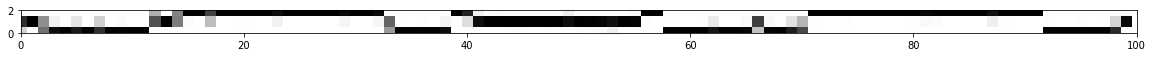

In [15]:
alfa = utils.normalize_exp(update,0)
plt.figure(figsize=(20,10))
plt.imshow(alfa, interpolation='nearest', cmap='gray_r')
plt.axis([0,100,2,0])
plt.gca().invert_yaxis()
plt.show()

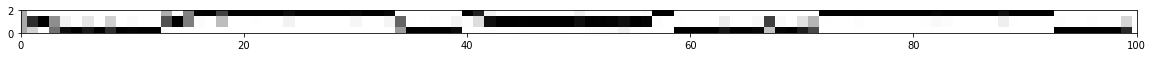

In [16]:
alfa = utils.normalize_exp(predict,0)
plt.figure(figsize=(20,10))
plt.imshow(alfa, interpolation='nearest', cmap='gray_r')
plt.axis([0,100,2,0])
plt.gca().invert_yaxis()
plt.show()

In [17]:
_, postdict = hmm.backward_pass(observations)

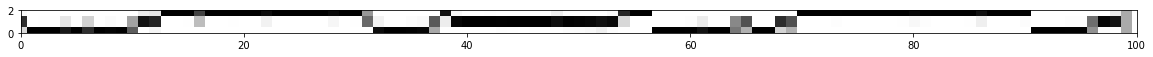

In [18]:
beta = utils.normalize_exp(postdict,0)
plt.figure(figsize=(20,10))
plt.imshow(beta, interpolation='nearest', cmap='gray_r')
plt.axis([0,100,2,0])
plt.gca().invert_yaxis()
plt.show()

In [19]:
log_gamma = hmm.forward_backward(observations)

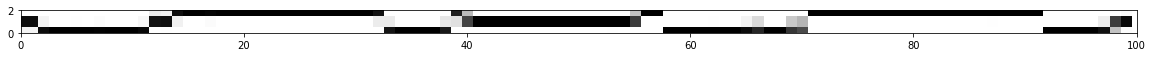

In [20]:
gamma = utils.normalize_exp(log_gamma,0)
plt.figure(figsize=(20,10))
plt.imshow(gamma, interpolation='nearest', cmap='gray_r')
plt.axis([0,100,2,0])
plt.gca().invert_yaxis()
plt.show()

In [21]:
max_path = hmm.viterbi(observations)

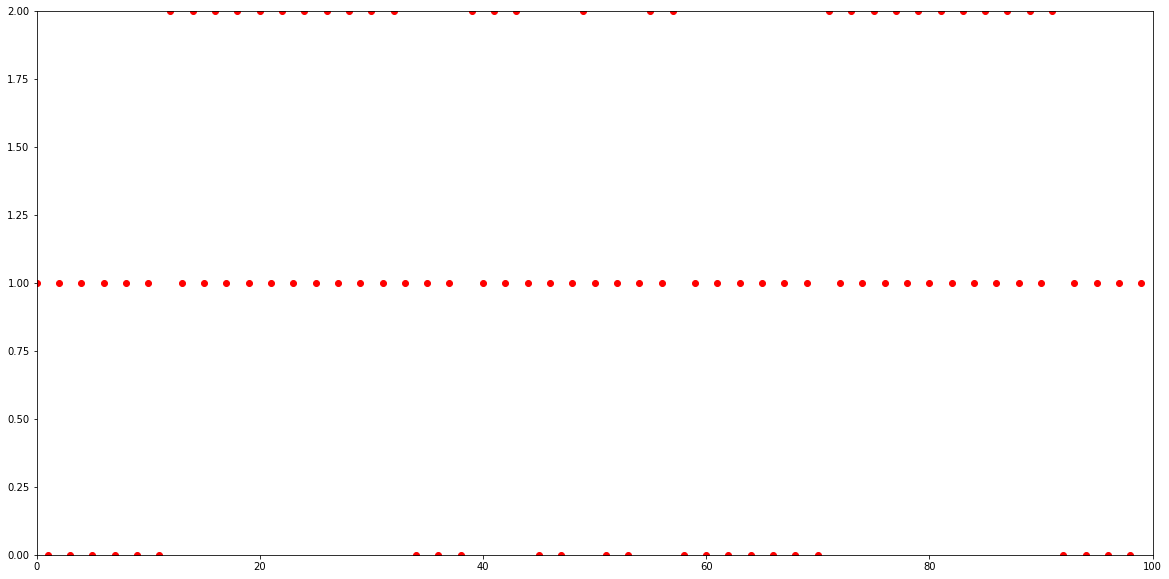

In [22]:
plt.figure(figsize=(20,10))
plt.plot(t, max_path, 'ro')
plt.axis([0,100,0,2])
plt.show()

In [18]:
_,y = hmm.generate_data(500)

In [19]:
A_estimated, B_estimated, pi_estimated = hmm.parameter_estimation_em(y,20)

In [20]:
print A_estimated

[[9.66286365e-01 2.45293120e-14 3.45457668e-04 9.49012820e-04
  4.66405381e-04 8.52959251e-06 3.88604137e-02 3.50561625e-03
  1.49968671e-09 1.01179508e-07]
 [3.08593431e-04 9.65164906e-01 2.35042432e-04 1.64690422e-02
  2.60406300e-06 1.07893171e-05 1.15447904e-08 7.13453853e-04
  7.96372594e-03 5.58229836e-04]
 [1.37625500e-03 1.84389566e-03 9.91156991e-01 1.83207875e-04
  5.68484982e-03 1.16802753e-05 2.51183749e-08 1.64829297e-03
  3.98655034e-16 1.01825336e-03]
 [1.30396228e-12 7.02245635e-04 9.66923048e-05 3.92750764e-01
  6.16511869e-04 2.62017556e-04 1.59568622e-02 4.76959502e-01
  5.06400553e-07 5.10183602e-03]
 [9.34445455e-07 1.30863688e-02 8.19537003e-09 8.03178472e-05
  9.41465496e-01 1.17949760e-11 1.46914244e-02 8.40546980e-06
  1.80130586e-12 2.63920859e-02]
 [1.19325896e-07 3.59114279e-03 7.69949769e-05 1.19590940e-09
  2.75467239e-04 9.39434089e-01 6.87116317e-04 9.64894272e-03
  5.14526908e-04 3.21519228e-11]
 [2.91277136e-02 8.57954121e-07 4.99342709e-05 3.37406929e

In [21]:
print B_estimated

[[2.03921679e-02 5.30872772e-01 5.89721025e-02 1.89317576e-02
  1.96107701e-01 4.75917140e-02 1.40673692e-02 1.86941864e-02
  2.67730637e-02 6.46571250e-02]
 [2.21520114e-02 2.71612829e-04 8.80519120e-01 3.43483160e-03
  6.36582684e-02 3.85602825e-02 1.84636619e-06 1.23210025e-02
  2.68349879e-18 1.33693907e-02]
 [2.05269805e-02 6.30002392e-38 3.14038438e-26 6.79583167e-03
  2.20178979e-02 1.29547158e-43 2.16222024e-03 6.79013971e-03
  2.29855790e-02 3.02106825e-02]
 [2.17781547e-02 3.60328923e-01 2.42722733e-03 5.52464131e-02
  1.60718937e-15 1.06262035e-05 2.38137521e-11 1.57526140e-02
  5.91523942e-02 4.30648469e-02]
 [8.39223409e-01 3.62279118e-32 2.08043933e-02 8.52323700e-04
  1.43953231e-04 1.69319251e-02 2.62218658e-01 4.31809550e-02
  3.56959103e-08 1.90370015e-05]
 [2.00228417e-09 1.97875503e-02 1.10996169e-05 8.43310297e-06
  4.64242281e-03 8.62917851e-01 5.50466264e-02 7.40174354e-03
  2.56087885e-02 6.35728088e-07]
 [8.93225657e-11 3.15366320e-02 1.84289388e-02 9.01530525e

In [22]:
print pi_estimated

[5.64903919e-022 1.63510555e-045 4.62535544e-158 2.36638266e-039
 7.34648240e-123 3.47126392e-044 1.58000066e-003 3.50548753e-040
 9.98419999e-001 9.00806189e-052]


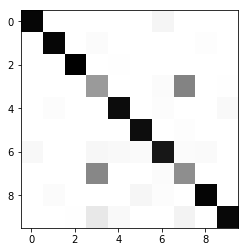

In [23]:
plt.imshow(A_estimated, cmap=plt.cm.binary)
plt.show()

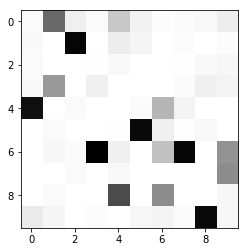

In [24]:
plt.imshow(B_estimated, cmap=plt.cm.binary)
plt.show()